In [1]:
# 📌 Step 1: Import Required Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# 📌 Step 2: Load Cleaned Data and Prepare Features

# Load the cleaned and scaled dataset
df = pd.read_csv("parkinsons_cleaned.csv")

# Split into features and target
X = df.drop("status", axis=1)
y = df["status"]

# Train-test split (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# 📌 Step 3: Train Machine Learning Models

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [5]:
# 📌 Step 4: Define Evaluation Function

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n📊 Model: {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")



📊 Model: Logistic Regression
Accuracy : 0.9230769230769231
Precision: 0.9333333333333333
Recall   : 0.9655172413793104
F1 Score : 0.9491525423728814
ROC AUC  : 0.9241379310344828
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


📊 Model: Random Forest
Accuracy : 0.9230769230769231
Precision: 0.9333333333333333
Recall   : 0.9655172413793104
F1 Score : 0.9491525423728814
ROC AUC  : 0.9620689655172414
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                   

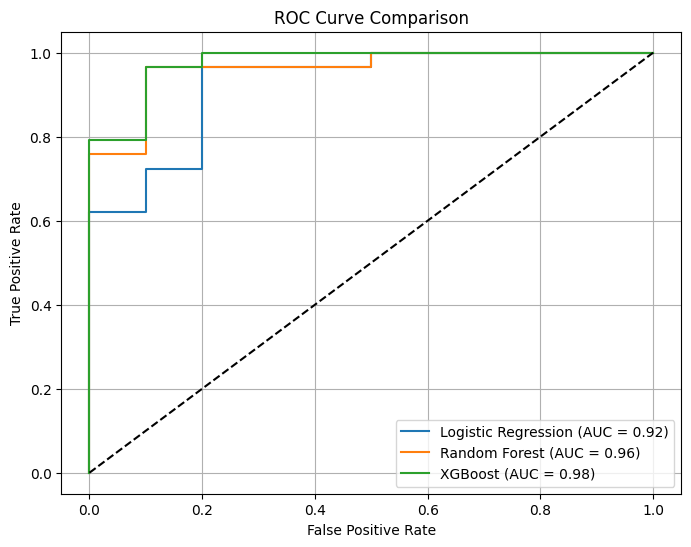

In [6]:
# 📌 Step 5: Evaluate All Models

plt.figure(figsize=(8, 6))

evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# 📌 Step 6: Save Best Model

# Choose your best-performing model and save
joblib.dump(xgb_model, "parkinsons_model.pkl")
print("✅ XGBoost model saved as 'parkinsons_model.pkl'")


✅ XGBoost model saved as 'parkinsons_model.pkl'
